Iván Vázquez Martínez

# Examen OPI Analytics

## Sección C

## BOPS

### 1. ¿Deberían expandirse a Canadá?



En mi opinion, ya que la iniciativa BOPS no se extendió a Canada y los datos muestran que hubo una pérdida millonaria, es posible que en esos años (debido a la tecnología en ese entonces) no era conveniente expandirse a Canada, tal vez se habría notado una mejora en las ventas online pero es una estrategia muy arriesgada. Por lo que mi respuesta es NO. 

En la actualidad considero que las ventas online ahora son mucho más populares que en 2011, la mayoría de empresas deberían optar por invertir y en expandir sus ventas via internet ya que ahora el internet es mucho más popular que en los años 2011-2012. Por lo que si consideramos este caso en año 2021 mi respuesta es SÍ. 

A continuacion muestro cómo hubo una pérdida millonaria en Home & Kitchen.

### 2. ¿Cuántos millones de dólares se ganaron o perdieron a partir del programa? Explica tu razonamiento y metodología. Pista: Existen dos experimentos naturales. Canadá y las tiendas que se encuentran lejos. Utilízalos.

In [98]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Leemos los datos:

In [64]:
ruta =r"C:\Users\sephc\python-spark-tutorial\BOPS_case"

bops_bm = pd.read_csv(ruta + r"\bops_bm.csv")
bops_online = pd.read_csv(ruta + r"\bops_online.csv")

bops_bm.head()

,id (store),year,month,week,usa,after,sales,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1.0,2011.0,4.0,16.0,0.0,0.0,"118,691",NaN,NaN,NaN,NaN
1,1.0,2011.0,4.0,17.0,0.0,0.0,"113,804",NaN,NaN,NaN,NaN
2,1.0,2011.0,4.0,18.0,0.0,0.0,"172,104",NaN,NaN,NaN,NaN
3,1.0,2011.0,5.0,19.0,0.0,0.0,"105,591",NaN,NaN,NaN,NaN
4,1.0,2011.0,5.0,20.0,0.0,0.0,"94,884",NaN,NaN,NaN,NaN


In [65]:
bops_bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4538 entries, 0 to 4537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id (store)   4536 non-null   float64
 1   year         4536 non-null   float64
 2   month        4536 non-null   float64
 3   week         4536 non-null   float64
 4   usa          4536 non-null   float64
 5   after        4536 non-null   float64
 6    sales       4536 non-null   object 
 7   Unnamed: 7   1 non-null      float64
 8   Unnamed: 8   1 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  1 non-null      float64
dtypes: float64(10), object(1)
memory usage: 390.1+ KB


In [66]:
bops_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10710 entries, 0 to 10709
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id (DMA)     10710 non-null  int64  
 1   year         10710 non-null  int64  
 2   month        10710 non-null  int64  
 3   week         10710 non-null  int64  
 4   after        10710 non-null  int64  
 5   close        10710 non-null  int64  
 6    sales       10710 non-null  object 
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
dtypes: float64(10), int64(6), object(1)
memory usage: 1.4+ MB


Quitamos las columnas "Unnamed":

In [67]:
bops_bm = bops_bm.drop(bops_bm.columns.tolist()[-4:], axis = 1)

bops_bm.head()

,id (store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,"118,691"
1,1.0,2011.0,4.0,17.0,0.0,0.0,"113,804"
2,1.0,2011.0,4.0,18.0,0.0,0.0,"172,104"
3,1.0,2011.0,5.0,19.0,0.0,0.0,"105,591"
4,1.0,2011.0,5.0,20.0,0.0,0.0,"94,884"


In [68]:
bops_online.head()

,id (DMA),year,month,week,after,close,sales,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,2011,4,17,0,1,"18,564",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2011,4,18,0,1,"30,883",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2011,5,19,0,1,"37,425",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2011,5,20,0,1,"32,563",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2011,5,21,0,1,"35,773",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Quitamos las columnas "Unnamed":

In [69]:
bops_online = bops_online.drop(bops_online.columns.tolist()[7:], axis = 1)

bops_online.head()

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,"18,564"
1,1,2011,4,18,0,1,"30,883"
2,1,2011,5,19,0,1,"37,425"
3,1,2011,5,20,0,1,"32,563"
4,1,2011,5,21,0,1,"35,773"


In [70]:
bops_bm.columns

Index(['id (store)', 'year', 'month', 'week', 'usa', 'after', ' sales '], dtype='object')

In [71]:
bops_online.columns

Index(['id (DMA)', 'year', 'month', 'week', 'after', 'close', ' sales '], dtype='object')

Quitamos los espacios en blanco en los nombres de las columnas " sales ":

In [72]:
bops_bm.rename(columns={' sales ':'sales'}, inplace=True)

bops_bm.columns

Index(['id (store)', 'year', 'month', 'week', 'usa', 'after', 'sales'], dtype='object')

In [73]:
bops_online.rename(columns={' sales ':'sales'}, inplace=True)

bops_online.columns

Index(['id (DMA)', 'year', 'month', 'week', 'after', 'close', 'sales'], dtype='object')

Veamos cuantos valores faltantes hay en cada columna:

In [74]:
missing_bm = bops_bm.isnull().sum()
missing_on = bops_online.isnull().sum()

missing_bm

id (store)    2
year          2
month         2
week          2
usa           2
after         2
sales         2
dtype: int64

In [75]:
missing_on

id (DMA)    0
year        0
month       0
week        0
after       0
close       0
sales       0
dtype: int64

Quitamos las filas con valores faltantes en bops_bm:

In [76]:
bops_bm.dropna(how="any",inplace=True)
missing_bm = bops_bm.isnull().sum()
missing_bm

id (store)    0
year          0
month         0
week          0
usa           0
after         0
sales         0
dtype: int64

Cambiamos el tipo de datos en bops_bm a int:

In [79]:
bops_bm[bops_bm.columns.tolist()[:-1]] = bops_bm[bops_bm.columns.tolist()[:-1]].astype(int)

bops_bm.head()

,id (store),year,month,week,usa,after,sales
0,1,2011,4,16,0,0,"118,691"
1,1,2011,4,17,0,0,"113,804"
2,1,2011,4,18,0,0,"172,104"
3,1,2011,5,19,0,0,"105,591"
4,1,2011,5,20,0,0,"94,884"


Convertimos las columnas "sales" que son de tipo "object" a tipo "float":

In [137]:
nueva_salesbm = [i.replace(',', '.') for i in bops_bm.sales.tolist()]
convrt = [float(nueva_salesbm[i]) for i in range(len(nueva_salesbm))]
bops_bm["sales"] = pd.Series(convrt)

bops_bm.head()


,id (store),year,month,week,usa,after,sales
0,1,2011,4,16,0,0,118.691
1,1,2011,4,17,0,0,113.804
2,1,2011,4,18,0,0,172.104
3,1,2011,5,19,0,0,105.591
4,1,2011,5,20,0,0,94.884


In [139]:
nueva_saleson = [i.replace(',', '.') for i in bops_online.sales.tolist()]
convrt = [float(nueva_saleson[i]) for i in range(len(nueva_saleson))]
bops_online["sales"] = pd.Series(convrt)

bops_online.head()

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,18.564
1,1,2011,4,18,0,1,30.883
2,1,2011,5,19,0,1,37.425
3,1,2011,5,20,0,1,32.563
4,1,2011,5,21,0,1,35.773


Ya que la iniciativa BOPS comenzó el 11/10/2011, los datos que fueron registrados antes de BOPS tienen 0 en la columna "after" mientras los que se registraron durante la iniciativa tienen un 1 como indicador.

In [140]:
bops_bm_before = bops_bm[bops_bm.after == 0]
bops_bm_after = bops_bm[bops_bm.after == 1]
bops_online_before = bops_online[bops_online.after == 0]
bops_online_after = bops_online[bops_online.after == 1]

Observemos que cada conjunto tiene el mismo numero de meses excepto el bops_online_after que solo cuenta con 6 meses:

In [233]:
print(bops_bm_before["month"].nunique())
print(bops_bm_after["month"].nunique())
print(bops_online_before["month"].nunique())
print(bops_online_after["month"].nunique())

7
7
7
6


In [141]:
bops_bm_after.head()

,id (store),year,month,week,usa,after,sales
27,1,2011,10,43,0,1,105.130
28,1,2011,10,44,0,1,145.112
29,1,2011,10,45,0,1,106.205
30,1,2011,11,46,0,1,127.148
31,1,2011,11,47,0,1,138.521


Entonces las ventas fueron:

In [208]:
print("Antes de BOPS (B&M): ",'{:,}'.format(int(str(bops_bm_before["sales"].sum()).replace(".",""))))
print("Durante BOPS (B&M): ",'{:,}'.format(int(str(bops_bm_after["sales"].sum()).replace(".",""))))
print("Antes de BOPS (online): ",'{:,}'.format(int(str(bops_online_before["sales"].sum()).replace(".",""))))
print("Durante BOPS (online): ",'{:,}'.format(int(str(round(bops_online_after["sales"].sum(), 3)).replace(".",""))))

Antes de BOPS (B&M):  153,420,472
Durante BOPS (B&M):  136,308,894
Antes de BOPS (online):  635,678,848
Durante BOPS (online):  617,851,437


Calculamos el promedio en cada caso tomando en cuenta el numero de meses que contienen:

In [ ]:
a = int('{:,}'.format(int(str(bops_bm_before["sales"].sum()).replace(".",""))).replace(",",""))
b = int('{:,}'.format(int(str(bops_bm_after["sales"].sum()).replace(".",""))).replace(",",""))
c = int('{:,}'.format(int(str(bops_online_before["sales"].sum()).replace(".",""))).replace(",",""))
d = int('{:,}'.format(int(str(round(bops_online_after["sales"].sum(), 3)).replace(".",""))).replace(",",""))

Ya que vamos a comparar promedios antes y despues de BOPS, el numero de meses en cada caso deben ser iguales (para que sea más preciso y justo), por lo que quito 1 mes al promedio en bops_online_before:

In [235]:
mean_bm_before = a/bops_bm_before["month"].nunique()
mean_bm_after = b/bops_bm_after["month"].nunique()
mean_online_before = c/(bops_online_before["month"].nunique() - 1)
mean_online_after = d/bops_online_after["month"].nunique()

Ahora sumando los promedios B&M con ventas online antes y despues de BOPS:

In [236]:
promedio_before = mean_bm_before + mean_online_before
promedio_after = mean_bm_after + mean_online_after

Se tiene que hubo una perdida:

In [244]:
promedio_before > promedio_after

True

In [245]:
print("Perdida promedio de: ",round(promedio_before - promedio_after,2))

Perdida promedio de:  5415746.31


Podemos ver esto en graficos:

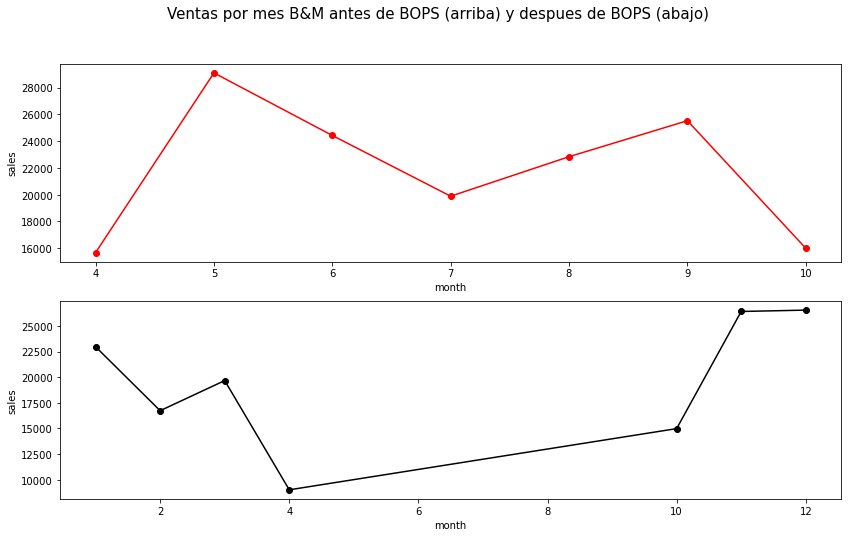

In [209]:
fig, axs = plt.subplots(2,figsize=(14,8))
fig.suptitle('Ventas por mes B&M antes de BOPS (arriba) y despues de BOPS (abajo)',fontsize=15)
axs[0].plot(bops_bm_before.groupby("month").agg({"sales":sum}),color = "r",marker="o")
axs[0].set_xlabel('month')
axs[0].set_ylabel('sales')
axs[1].plot(bops_bm_after.groupby("month").agg({"sales":sum}),color ="black",marker="o")
axs[1].set_xlabel('month')
axs[1].set_ylabel('sales')
plt.show()

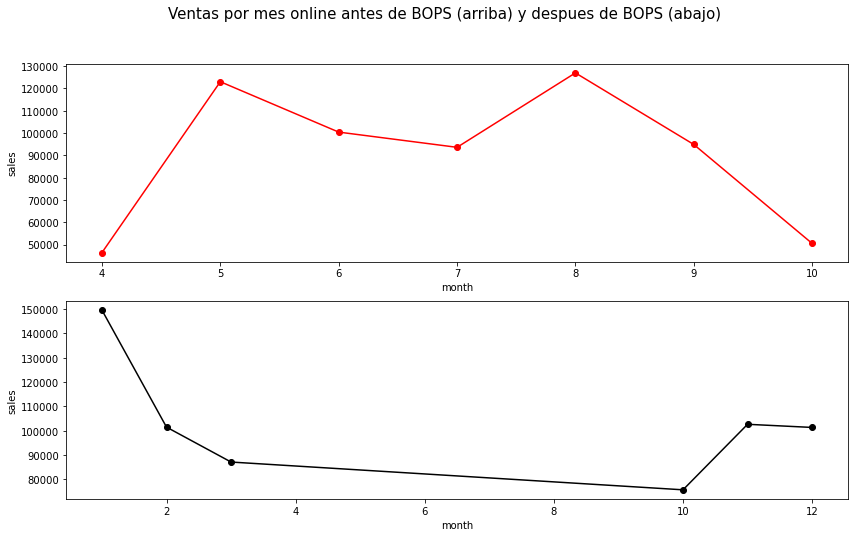

In [210]:
fig, axs = plt.subplots(2,figsize=(14,8))
fig.suptitle('Ventas por mes online antes de BOPS (arriba) y despues de BOPS (abajo)',fontsize=15)
axs[0].plot(bops_online_before.groupby("month").agg({"sales":sum}),color = "r",marker="o")
axs[0].set_xlabel('month')
axs[0].set_ylabel('sales')
axs[1].plot(bops_online_after.groupby("month").agg({"sales":sum}),color = "black",marker="o")
axs[1].set_xlabel('month')
axs[1].set_ylabel('sales')
plt.show()

Notemos que en ambos casos hubo una baja en las ventas al iniciar el iniciativa BOPS.